In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import nltk
nltk.download('punkt')

trump_tweets = pd.read_csv("trump_tweets.csv")

[nltk_data] Downloading package punkt to /Users/chris0519/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def tokenize(phrase):
    '''
    Returns an array of individual words in the string phrase
    phrase: The string to be tokenized
    '''
    tokens = nltk.word_tokenize(phrase)
    return tokens

In [5]:
print(trump_tweets)

      Unnamed: 0                   id  \
0              0  1314035056441257985   
1              1  1314033009293656065   
2              2  1314028978806624256   
3              3  1314028699084259329   
4              4  1314027975185182721   
...          ...                  ...   
1602        1602  1281932578048614402   
1603        1603  1281930300960976897   
1604        1604  1281928087324721154   
1605        1605  1281927670637432834   
1606        1606  1281927265589309441   

                                              full_text  \
0                               https://t.co/wHQx2qd8q2   
1     2010 to 2016 under Kamala Harris's watch as "T...   
2       https://t.co/4Wv5cCFEns https://t.co/kMvBv6Pu9I   
3                               https://t.co/rxqPqR4uqZ   
4                               https://t.co/xGevgI2wTO   
...                                                 ...   
1602  New documents just released reveal General Fly...   
1603  Big Senate Race in Alabama on

In [21]:
print("Mean of number of favourites Trump's tweets get is: {:.2f}".format(trump_tweets['favourite'].mean()));
print("Mean of number of retweets Trump's tweets get is: {:.2f}".format(trump_tweets['retweets'].mean()));

Mean of number of favourites Trump's tweets get is: 100213.01
Mean of number of retweets Trump's tweets get is: 23074.06


In [41]:
# Converting create_at column to datetime for later analysis use.
trump_tweets['datetime']=pd.to_datetime(trump_tweets['created_at'], format='%Y-%m-%d %H:%M:%S')
trump_tweets['date']=trump_tweets['datetime'].dt.date

#number of tweets by day

tweetsbyday=trump_tweets.date.value_counts()
print(trump_tweets['date'])
print(tweetsbyday)

dataframetweetsbyday = pd.DataFrame(np.array([trump_tweets['date'], [tweetsbyday]]))

0       2020-10-08
1       2020-10-08
2       2020-10-08
3       2020-10-08
4       2020-10-08
           ...    
1602    2020-07-11
1603    2020-07-11
1604    2020-07-11
1605    2020-07-11
1606    2020-07-11
Name: date, Length: 1607, dtype: object
2020-09-30    62
2020-10-07    48
2020-08-25    45
2020-09-08    44
2020-09-18    41
              ..
2020-08-08     3
2020-10-02     3
2020-09-19     3
2020-07-20     2
2020-07-22     2
Name: date, Length: 89, dtype: int64


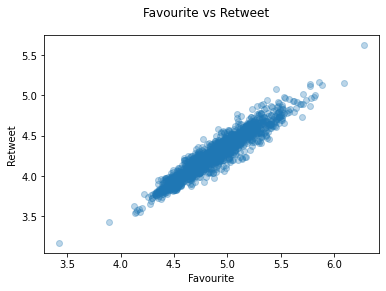

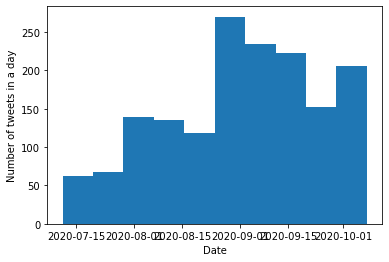

In [42]:
favouritelogged=trump_tweets.copy()
retweetslogged=trump_tweets.copy()

favouritelogged['favourite']=np.log10(favouritelogged['favourite'])
retweetslogged['retweets']=np.log10(retweetslogged['retweets'])

plt.scatter(favouritelogged.favourite, retweetslogged.retweets, alpha=0.3)
plt.xlabel('Favourite')
plt.ylabel('Retweet')
plt.suptitle('Favourite vs Retweet')
plt.show()

plt.hist(trump_tweets['date'])
plt.xlabel('Date')
plt.ylabel('Number of tweets in a day')
plt.show()

In [7]:
# Summary stats for the full_text column
trump_total_words = 0 # The number of words Trump used across all the Tweets we collected
trump_word_counts_list = [] # A list of the word count for each tweet
for tweet in trump_tweets["full_text"]:
    tweet_length = len(tokenize(tweet))
    trump_word_counts_list.append(tweet_length)                 
    trump_total_words += tweet_length
print("Trump words tweeted: " + str(trump_total_words))
trump_mean_wordcount = np.mean(trump_word_counts_list) #Mean number of words in each of Trump's tweets
print("Mean number of words in each Trump tweet: {:.2f}".format(trump_mean_wordcount))
trump_median_wordcount = np.median(trump_word_counts_list)
print("Median number of words in each Trump tweet: " + str(trump_median_wordcount))
trump_mode_wordcount = statistics.mode(trump_word_counts_list)
print("Mode number of words in each Trump tweet: " + str(trump_mode_wordcount))
trump_minimum_words = min(trump_word_counts_list)
print("The least number of words Trump used in a tweet was: " + str(trump_minimum_words))
trump_maximum_words = max(trump_word_counts_list)
print("The most number of words Trump used in a tweet was: " + str(trump_maximum_words))
trump_stddev_wordcount = np.std(trump_word_counts_list)
print("Standard deviation of number of words in each Trump tweet: {:.2f}".format(trump_stddev_wordcount))

Trump words tweeted: 42295
Mean number of words in each Trump tweet: 26.32
Median number of words in each Trump tweet: 20.0
Mode number of words in each Trump tweet: 3
The least number of words Trump used in a tweet was: 3
The most number of words Trump used in a tweet was: 76
Standard deviation of number of words in each Trump tweet: 21.06
